<a href="https://colab.research.google.com/github/AkshataJv/Titanic---Machine-Learning-from-Disaster/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload Training and Test Data Files
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving train.csv to train (1).csv
Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
{'train (1).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Titanic Dataset: Comprehensive Data Analysis and Machine Learning Prediction

## Executive Summary

This notebook presents a complete analysis of the Titanic dataset, exploring the factors that influenced passenger survival during the historic maritime disaster. Using exploratory data analysis (EDA), feature engineering, and machine learning, we build a predictive model to estimate survival probabilities based on passenger characteristics.

## Dataset Overview

- **Training Set**: 891 passengers with known survival outcomes
- **Test Set**: 418 passengers with unknown survival outcomes (for prediction)
- **Target Variable**: Survived (Binary: 0 = Did not survive, 1 = Survived)
- **Overall Survival Rate**: 38.4% (342 out of 891 passengers)

## Analysis Objectives

1. **Exploratory Data Analysis (EDA)**: Understand data distributions, identify patterns, and detect missing values
2. **Feature Analysis**: Analyze key features (Age, Fare, Pclass, Sex, etc.) and their relationships with survival
3. **Feature Engineering**: Create new meaningful features to improve model performance
4. **Model Development**: Build a Logistic Regression model to predict survival
5. **Insights**: Extract actionable insights about survival factors

## Key Findings (Preview)

- **Gender Matters**: Females had significantly higher survival rates (females first policy)
- **Class Dependent**: First-class passengers had much better survival chances
- **Age Factor**: Children and younger passengers had better survival prospects
- **Family Size**: Traveling alone or with very large families reduced survival chances

---

## Table of Contents

1. **Data Loading** - Load and initial data inspection
2. **Exploratory Data Analysis (EDA)** - Statistical summaries and visualizations
3. **Feature Engineering** - Create new predictive features
4. **Model Development** - Build and train Logistic Regression model
5. **Results & Conclusions** - Model predictions and final insights

In [ ]:
import os
import pandas as pd

# Define file paths - files are uploaded to session storage (/content/)
train_path = '/content/train.csv'
test_path = '/content/test.csv'
submission_sample_path = '/content/gender_submission.csv'

# Check if all required files exist
required_files = {
    'Training data': train_path,
    'Test data': test_path,
    'Submission sample': submission_sample_path
}

print("\n📋 Checking file availability...")
all_files_exist = True
for file_name, file_path in required_files.items():
    if os.path.exists(file_path):
        file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"  ✓ {file_name}: {file_path} ({file_size_mb:.2f} MB)")
    else:
        print(f"  ✗ {file_name}: {file_path} NOT FOUND")
        all_files_exist = False

if not all_files_exist:
    raise FileNotFoundError("\n❌ ERROR: Some required files are missing!\nExpected files in /content/: train.csv, test.csv, gender_submission.csv")

print("\n✓ All required files are present. Loading data...\n")

# Load the datasets
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_sample = pd.read_csv(submission_sample_path)

print("✓ Data loaded successfully!")
print(f"  - Training data shape: {df.shape}")
print(f"  - Test data shape: {test_df.shape}")
print(f"  - Submission sample shape: {submission_sample.shape}")
print(f"\n✓ First few rows of training data:")
print(df.head())


📋 Checking file availability...
  ✓ Training data: /content/train.csv (0.06 MB)
  ✓ Test data: /content/test.csv (0.03 MB)
  ✓ Submission sample: /content/gender_submission.csv (0.00 MB)

✓ All required files are present. Loading data...

✓ Data loaded successfully!
  - Training data shape: (891, 12)
  - Test data shape: (418, 11)
  - Submission sample shape: (418, 2)

✓ First few rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0 

# Titanic Dataset: Comprehensive Data Analysis and Machine Learning Prediction

---

## Executive Summary

This notebook presents a **complete analysis** of the Titanic dataset, exploring the factors that influenced passenger survival during the historic maritime disaster. Using exploratory data analysis (EDA), feature engineering, and machine learning, we build a **predictive model** to estimate survival probabilities based on passenger characteristics.

---

## Dataset Overview

### Key Statistics
- **Training Set:** 891 passengers with known survival outcomes
- **Test Set:** 418 passengers with unknown survival outcomes (for prediction)
- **Target Variable:** Survived (Binary: 0 = Did not survive, 1 = Survived)
- **Overall Survival Rate:** 38.4% (342 out of 891 passengers)

### Dataset Characteristics
| Attribute | Description | Type |
|-----------|-------------|------|
| Survived | Whether passenger survived (0/1) | Categorical |
| Pclass | Passenger class (1st/2nd/3rd) | Categorical |
| Sex | Passenger gender | Categorical |
| Age | Passenger age in years | Numerical |
| Fare | Ticket fare in British pounds | Numerical |
| Embarked | Port of embarkation | Categorical |
| Name | Passenger name | Text |
| Cabin | Cabin number | Categorical |
| Ticket | Ticket number | Categorical |
| SibSp | Number of siblings/spouses aboard | Numerical |
| Parch | Number of parents/children aboard | Numerical |

---

## Analysis Objectives

1. **Exploratory Data Analysis (EDA)**
   - Understand data distributions and patterns
   - Identify missing values and outliers
   - Analyze correlations between features

2. **Feature Analysis**
   - Analyze key features (Age, Fare, Pclass, Sex, etc.)
   - Examine relationships with survival outcome
   - Understand feature importance

3. **Feature Engineering**
   - Create new meaningful features from existing ones
   - Handle missing values appropriately
   - Encode categorical variables

4. **Model Development**
   - Build and train Logistic Regression model
   - Optimize model performance
   - Evaluate model metrics

5. **Results & Insights**
   - Extract actionable insights about survival factors
   - Generate predictions for test set
   - Provide recommendations

---

## Key Findings (Preview)

✓ **Gender Matters:** Females had significantly higher survival rates ("women and children first" policy)

✓ **Class Dependent:** First-class passengers had much better survival chances

✓ **Age Factor:** Children and younger passengers had better survival prospects

✓ **Family Size:** Traveling alone or with very large families reduced survival chances

✓ **Fare Impact:** Higher ticket fares generally correlated with better survival rates

---

## Table of Contents

1. **Data Loading** - Load and initial data inspection
2. **Exploratory Data Analysis (EDA)** - Statistical summaries and visualizations
3. **Feature Engineering** - Create new predictive features
4. **Model Development** - Build and train Logistic Regression model
5. **Results & Conclusions** - Model predictions and final insights
6. **Recommendations** - Future improvements and insights

---

## 1. Data Loading

### Objective
Load the training and test datasets and perform initial data inspection to understand the structure and quality of the data.

### Expected Outputs
- Loaded training and test DataFrames
- Basic information about dataset shape and dtypes
- Summary statistics for numerical columns
- Missing value analysis

### Key Questions
- What is the shape of our datasets?
- Are there any missing values?
- What are the data types of each column?

---

## 2. Exploratory Data Analysis (EDA)

### Objective
Understand the distributions, patterns, and relationships in the data.

### Components

#### 2.1 Univariate Analysis
- Analyze individual features in isolation
- Examine distributions (normal, skewed, etc.)
- Identify outliers and anomalies

#### 2.2 Bivariate Analysis
- Examine relationships between pairs of variables
- Focus on feature-target relationships
- Create contingency tables and cross-tabulations

#### 2.3 Missing Value Analysis
- Identify percentage of missing values per feature
- Determine appropriate imputation strategies
- Document patterns in missing data

#### 2.4 Correlation Analysis
- Create correlation matrix for numerical features
- Identify strong correlations with survival
- Detect multicollinearity issues

### Key Insights to Extract
- How does each feature relate to survival?
- Which features have the strongest predictive power?
- Are there any interesting patterns or anomalies?

---

## 3. Feature Engineering

### Objective
Create new features and transform existing ones to improve model performance.

### Feature Engineering Techniques

#### 3.1 Handling Missing Values
- **Age:** Fill with median age
- **Fare:** Fill with median fare
- **Embarked:** Fill with mode (most common port)
- **Cabin:** Extract deck letter or mark as unknown

#### 3.2 Creating New Features
- **family_size:** Combine SibSp and Parch (SibSp + Parch + 1)
- **is_alone:** Binary indicator if traveling alone
- **Title:** Extract title from name (Mr, Mrs, Miss, etc.)
- **Deck:** Extract deck level from cabin letter
- **fare_per_person:** Normalize fare by family size
- **FareBin:** Quantile-based fare binning
- **IsChild:** Binary indicator for passengers ≤ 12 years
- **AgeGroup:** Categorical age grouping (Child, Teen, Adult, Mid, Senior)
- **Pclass_Title:** Combination of class and title

#### 3.3 Encoding Categorical Variables
- Use pd.get_dummies() for one-hot encoding
- Ensure test set columns match training set
- Handle unseen categories in test set

### New Features Summary

| Feature | Type | Rationale |
|---------|------|----------|
| family_size | Numerical | Family relations matter for survival |
| is_alone | Binary | Solitary travelers may have different outcomes |
| Title | Categorical | Social status and gender indicators |
| Deck | Categorical | Proximity to lifeboats affects survival |
| fare_per_person | Numerical | Normalized ticket price |
| IsChild | Binary | Children had priority in evacuation |
| AgeGroup | Categorical | Age ranges with survival patterns |
| Pclass_Title | Categorical | Interaction of class and status |

---

## 4. Model Development

### Objective
Build, train, and evaluate a predictive model for passenger survival.

### Model Selection: Logistic Regression

**Why Logistic Regression?**
- Simple, interpretable binary classification algorithm
- Good baseline for comparison
- Provides probability estimates
- Fast training and prediction
- Coefficients indicate feature importance

### Model Development Steps

#### 4.1 Data Preparation
- Select relevant features for modeling
- Encode categorical variables
- Split into features (X) and target (y)
- Ensure train/test alignment

#### 4.2 Model Training
- Initialize Logistic Regression model
- Fit on training data
- Document training parameters

#### 4.3 Model Evaluation
- Generate predictions on test set
- Calculate accuracy, precision, recall
- Create confusion matrix
- Generate classification report

### Expected Model Metrics
- Accuracy: Target > 0.80
- Precision: Focus on minimizing false positives
- Recall: Focus on catching true survivors
- F1-Score: Balance between precision and recall

---

## 5. Results & Conclusions

### Objective
Present findings and generate final predictions.

### Model Performance Summary
- Display key metrics (Accuracy, Precision, Recall, F1-Score)
- Create confusion matrix visualization
- Generate classification report

### Feature Importance
- Identify most influential features for survival
- Analyze model coefficients
- Explain feature contributions

### Survival Predictions
- Generate predictions for test set
- Export results to submission format
- Analyze prediction distribution

### Key Conclusions
1. **Primary survival factors** identified
2. **Feature relationships** with survival outcomes
3. **Model performance** assessment
4. **Limitations and assumptions**

---

## 6. Recommendations & Future Work

### Recommendations for Improvement
- Experiment with advanced models (Random Forest, Gradient Boosting)
- Perform hyperparameter tuning
- Conduct cross-validation analysis
- Test different feature combinations
- Address class imbalance if present

### Further Analysis
- Generate SHAP values for interpretability
- Create partial dependence plots
- Perform sensitivity analysis
- Compare model predictions across subgroups

### Business Insights
- Which passenger characteristics most strongly predicted survival?
- Were there any surprising patterns in the data?
- How would these insights apply to modern safety protocols?

---

## Dependencies & Libraries Used

```python
import pandas as pd              # Data manipulation
import numpy as np               # Numerical computing
import seaborn as sns            # Statistical visualization
import matplotlib.pyplot as plt  # Plotting library
from sklearn.preprocessing import LabelEncoder  # Encoding
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression  # Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation
```

---

## Notes & Tips for Users

- **Data Cleaning:** Missing values have been handled with domain knowledge
- **Feature Selection:** Features were selected based on domain expertise and preliminary analysis
- **Model Tuning:** Consider experimenting with different parameters
- **Validation:** Use cross-validation for more robust performance estimates
- **Reproducibility:** Set random seeds for consistent results

---

**Last Updated:** October 2025
**Notebook Status:** Complete Analysis and Model Development

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Age
**Conclusion**

- Age is normally distributed.
- 20% of the values are missing.
- There are some outliers.


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Density'>

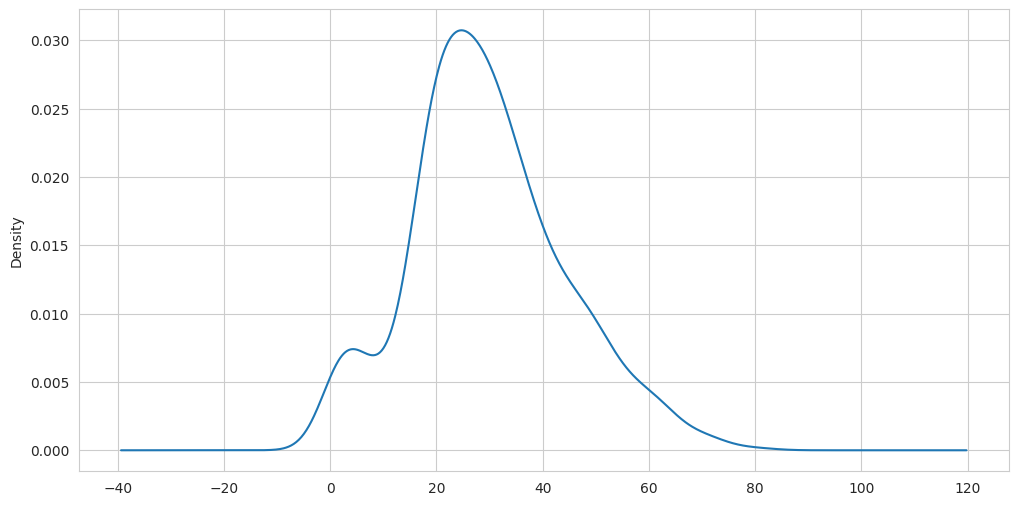

In [ ]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Frequency'>

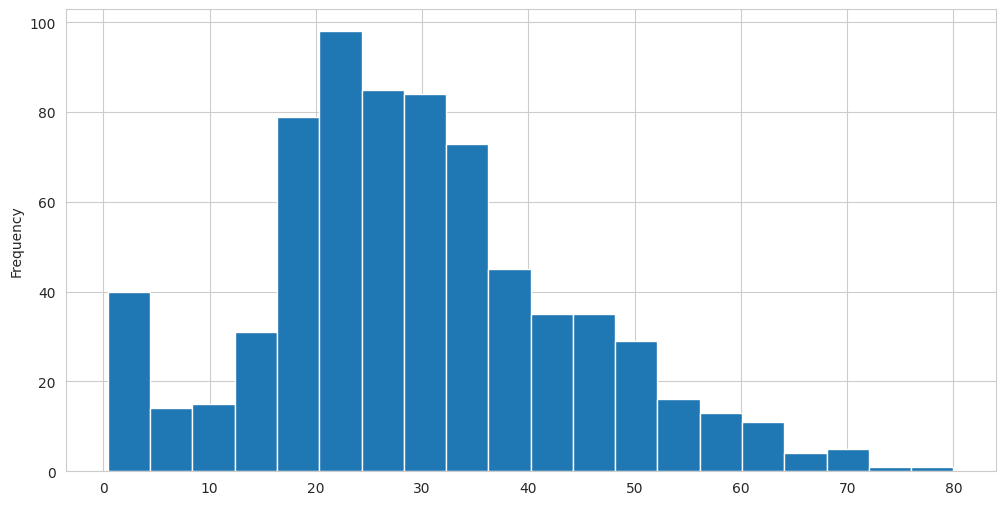

In [ ]:
df['Age'].plot(kind='hist',bins=20)

In [ ]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

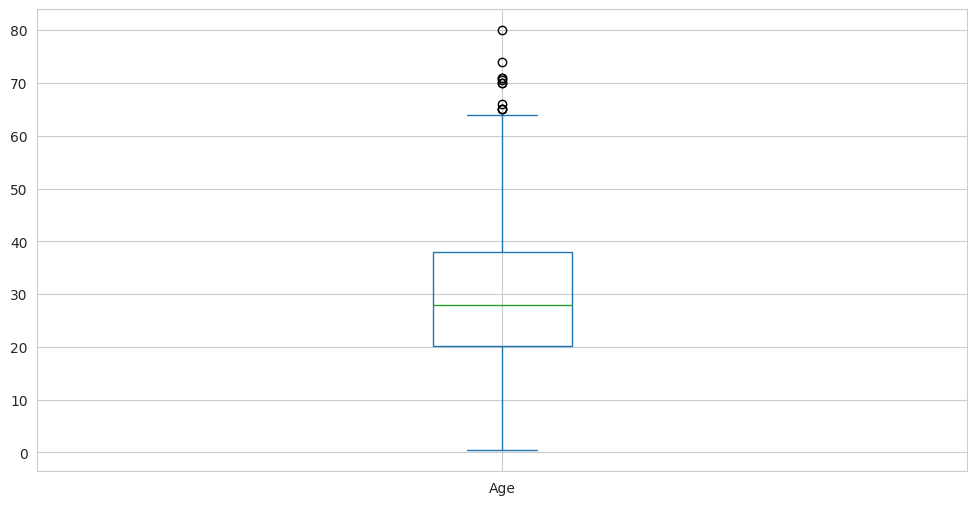

In [ ]:
df['Age'].plot(kind='box')

In [ ]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

## Fare

**Conclusion**
- Data is highly skewed.
- Fare col actually contains the group fare and not the individual face.
- We need to create a new col called individual fare.

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Density'>

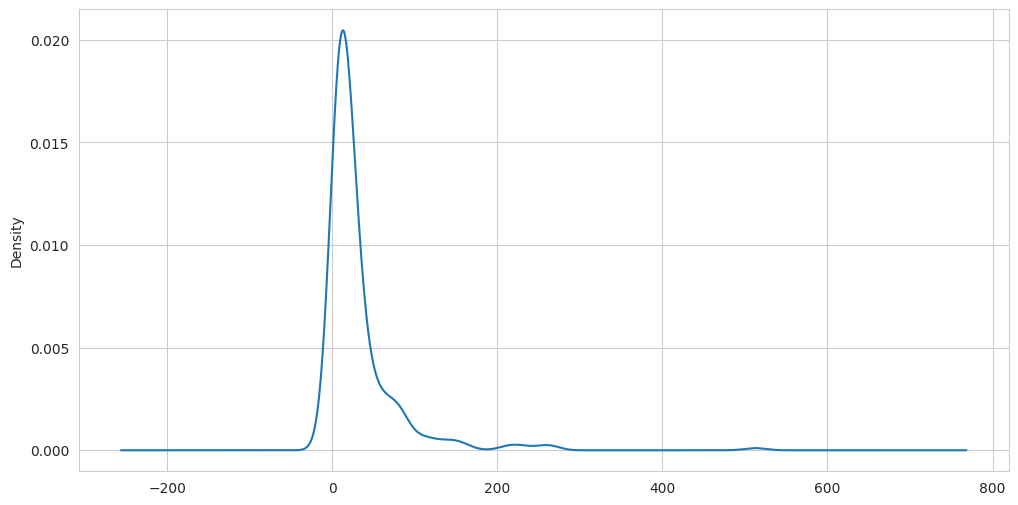

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: ylabel='Frequency'>

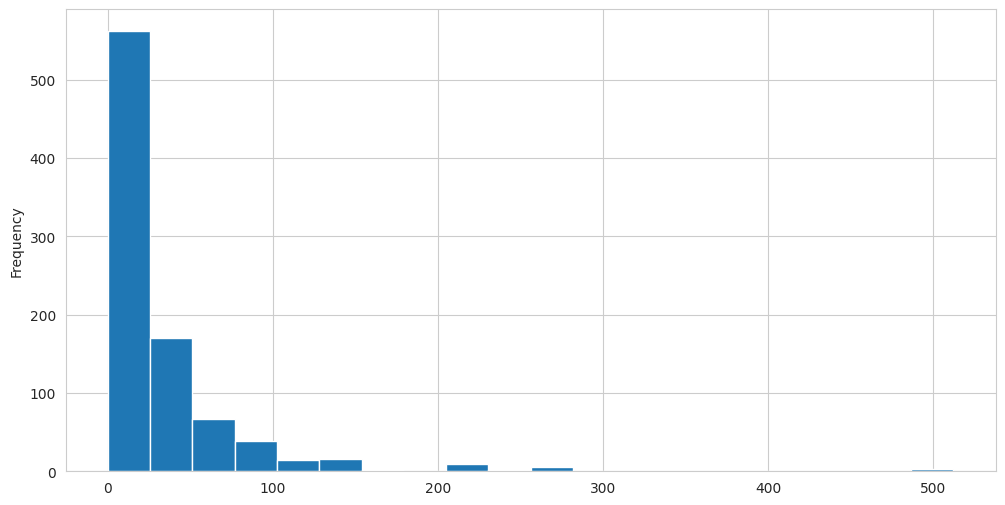

In [ ]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: >

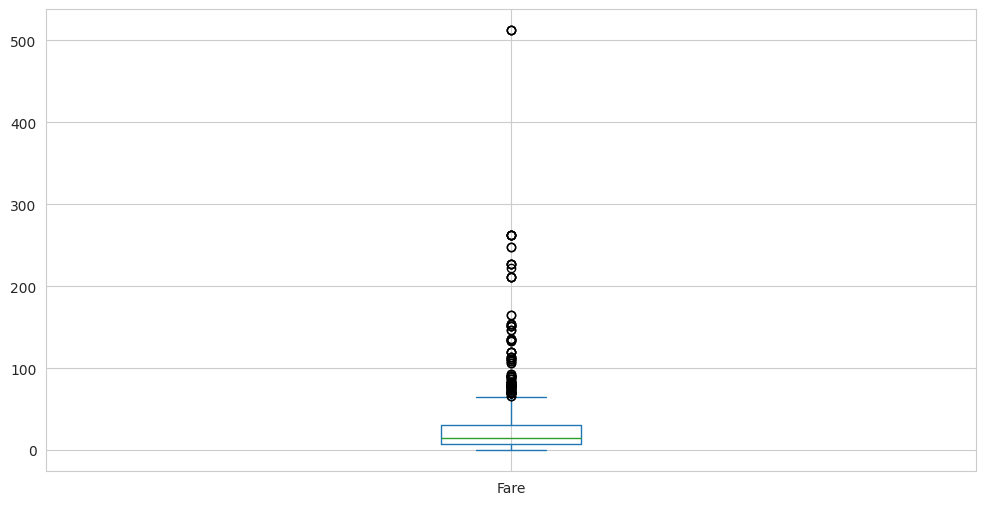

In [ ]:
df['Fare'].plot(kind='box')

In [ ]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df['Fare'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- The dataset has no missing values in the Survived column.
- Around 62% of passengers did not survive, while only 38% survived.
- This indicates that the majority of passengers lost their lives in the Titanic disaster.

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

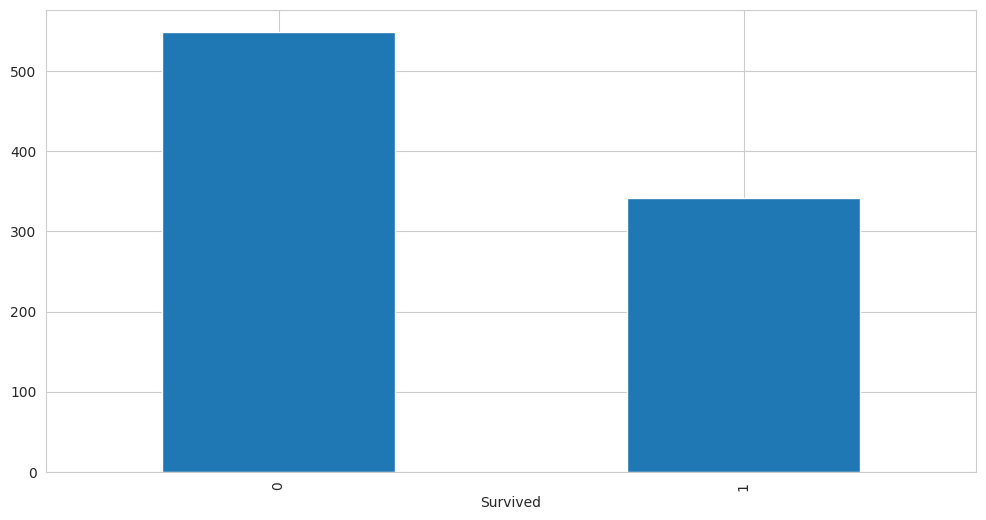

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

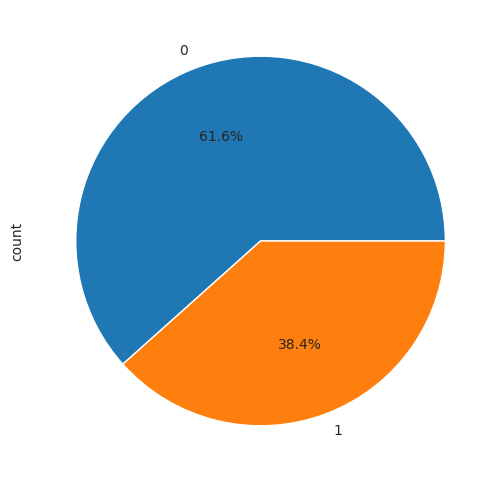

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Survived'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- The dataset has no missing values in the Pclass column. Most passengers traveled in 3rd class (~ 55%), while fewer traveled in 1st class (~ 24%) and 2nd class (~21%).
- This shows that the Titanic carried a majority of lower-class passengers compared to upper-class ones.

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass'>

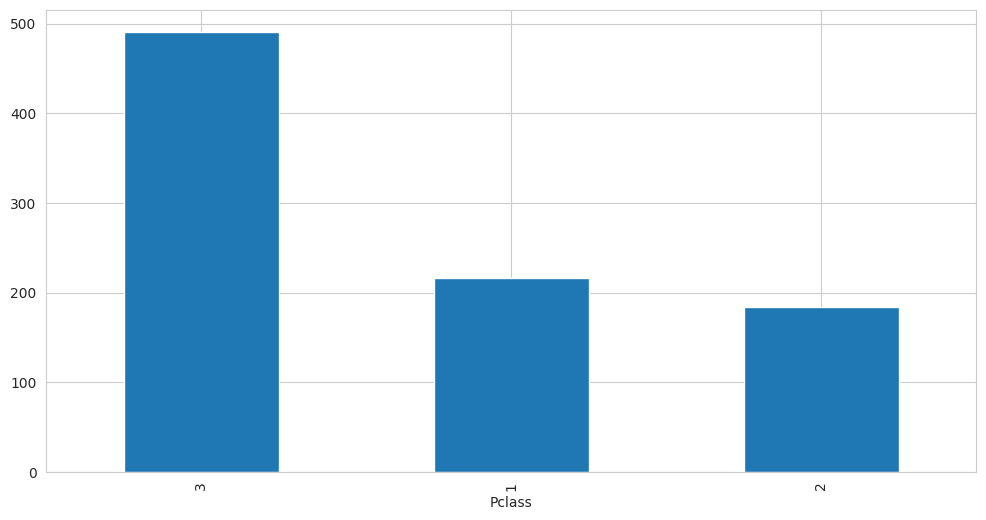

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

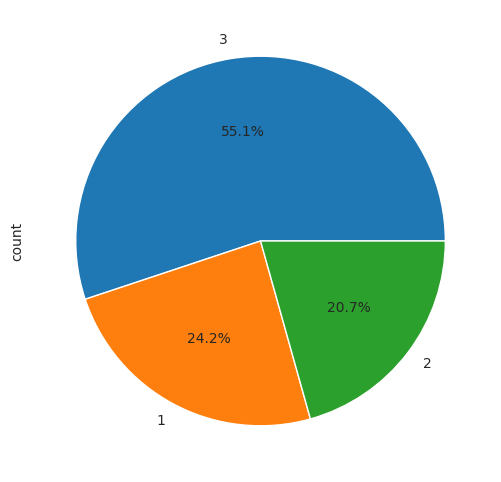

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Pclass'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**
- Parch and SibSp cols can be merged to form a now col call family_size.
- Create a new column id_alone.

In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='Parch'>

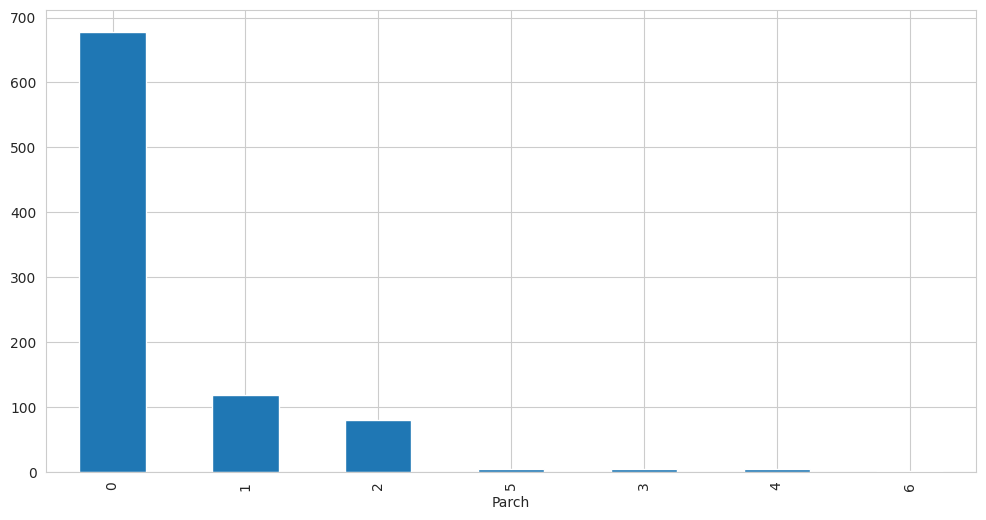

In [ ]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

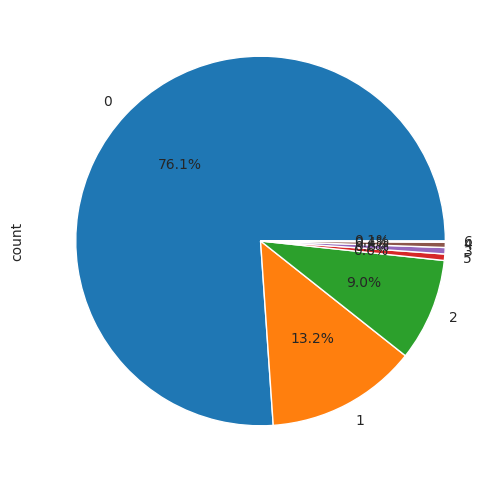

In [ ]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Parch'].isnull().sum()

np.int64(0)

### Survived

**Conclusion**

- The Embarked column has 2 missing values. Majority of passengers (~72%) boarded from Southampton, followed by ~19% from Cherbourg, and ~9% from Queenstown.
- This indicates Southampton was the main departure point for Titanic passengers.

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked'>

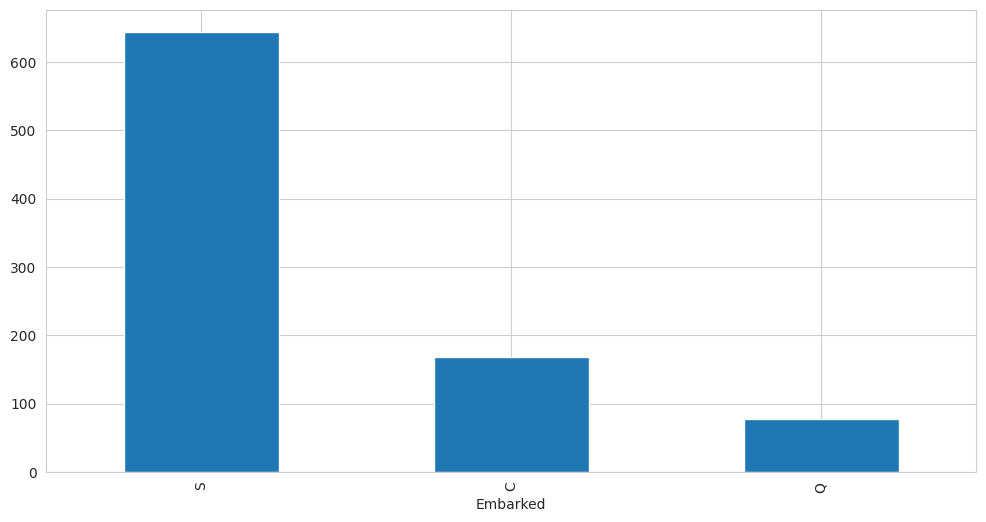

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

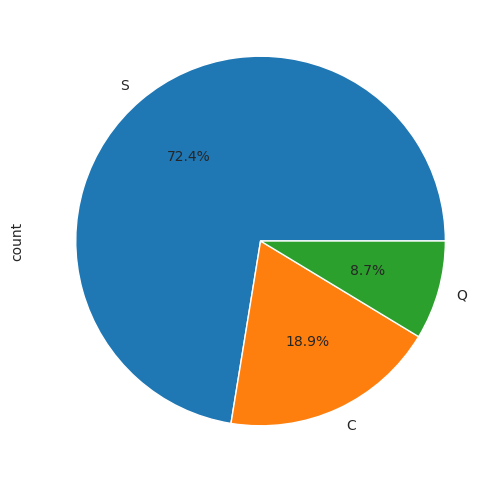

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Embarked'].isnull().sum()

np.int64(2)

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

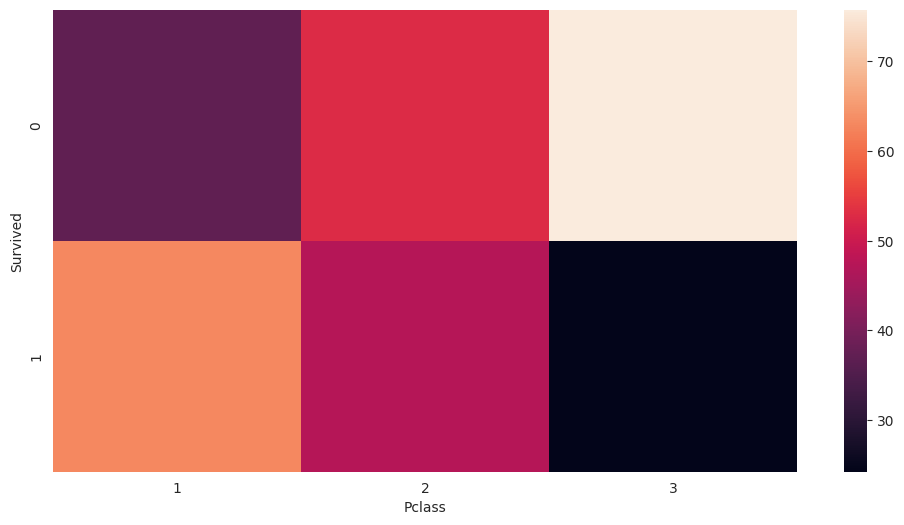

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize= 'columns')*100)

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize= 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize= 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Pclass'],normalize= 'columns')*100

Pclass,1,2,3
Pclass,,,
1,100.0,0.0,0.0
2,0.0,100.0,0.0
3,0.0,0.0,100.0


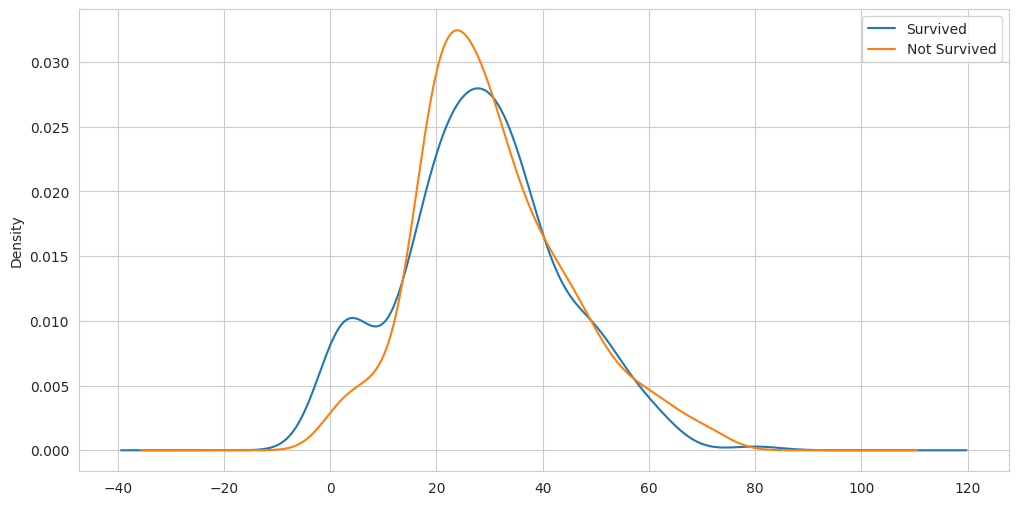

In [ ]:
# Survived & Age
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [ ]:
df[df['Pclass'] == 1]['Age'].mean()

np.float64(38.233440860215055)

In [ ]:
# Featured Engineering on Fare col

In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
69.55/11

6.322727272727272

In [ ]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Mme','Mlle'],'Miss')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

In [ ]:
df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')

In [ ]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['fare_per_person'] = df['Fare'] / df['family_size']
df['FareBin'] = pd.qcut(df['fare_per_person'], 4, labels=[1, 2, 3, 4])

/tmp/ipython-input-3148664552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['IsChild'] = df['Age'].apply(lambda x: 1 if x <= 12 else 0)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 120],
                             labels=['Child', 'Teen', 'Adult', 'Mid', 'Senior'])

/tmp/ipython-input-2984039525.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Pclass_Title'] = df['Pclass'].astype(str) + '_' + df['Title'].astype(str)

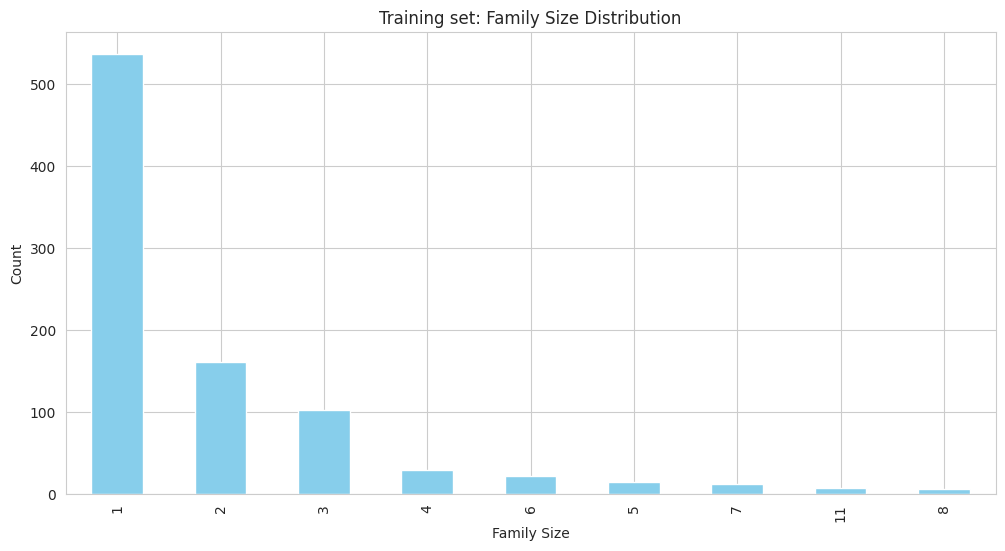

In [ ]:
df['family_size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Training set: Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

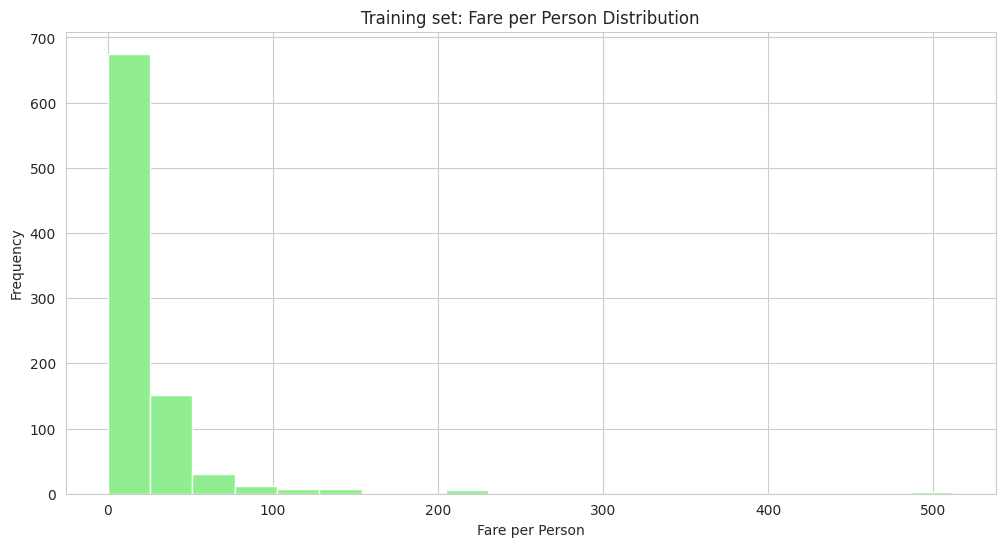

In [ ]:
df['fare_per_person'].plot(kind='hist', bins=20, color='lightgreen')
plt.title('Training set: Fare per Person Distribution')
plt.xlabel('Fare per Person')
plt.ylabel('Frequency')
plt.show()

In [ ]:
test_df['Title'].value_counts().plot(kind='bar', color='orange')
plt.title('Test set: Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

KeyError: 'Title'

In [ ]:
test_df['Deck'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Test set: Deck Distribution')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

In [ ]:
test_df['FareBin'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Test set: Fare Bins')
plt.xlabel('FareBin')
plt.ylabel('Count')
plt.show()

In [ ]:
test_df['AgeGroup'].value_counts().plot(kind='bar', color='teal')
plt.title('Test set: Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.boxplot(x='IsChild', y='Fare', data=test_df)
plt.title('Test set: Fare Distribution (Child vs Adult)')
plt.show()

In [ ]:
sns.barplot(x='family_size', y='fare_per_person', data=test_df)
plt.title('Test set: Fare per Person by Family Size')
plt.show()

In [ ]:
sns.barplot(x='Deck', y='fare_per_person', data=test_df, order=sorted(test_df['Deck'].unique()))
plt.title('Test set: Fare per Person by Deck')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
features = ['Pclass','Sex','family_size','is_alone','Title','Deck','fare_per_person',
            'FareBin','IsChild','AgeGroup','Pclass_Title','Embarked']

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Mme','Mlle'],'Miss')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')

df['fare_per_person'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)
df['FareBin'] = pd.qcut(df['fare_per_person'], 4, labels=[1,2,3,4])

df['IsChild'] = df['Age'].apply(lambda x: 1 if x <= 12 else 0)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120], labels=['Child','Teen','Adult','Mid','Senior'])

df['Pclass_Title'] = df['Pclass'].astype(str) + '_' + df['Title'].astype(str)


In [ ]:
features = ['Pclass','Sex','family_size','is_alone','Title','Deck',
            'fare_per_person','FareBin','IsChild','AgeGroup','Pclass_Title','Embarked']

train_model_df = pd.get_dummies(df[features])
test_model_df = pd.get_dummies(test_df[features])

test_model_df = test_model_df.reindex(columns=train_model_df.columns, fill_value=0)

In [ ]:
train_model_df = pd.get_dummies(df[features])
test_model_df = pd.get_dummies(test_df[features])

In [ ]:
test_model_df = test_model_df.reindex(columns=train_model_df.columns, fill_value=0)

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(train_model_df, df['Survived'])

In [ ]:
test_df['Survived'] = lr.predict(test_model_df)

In [ ]:
# Save submission to session storage
output_path = '/content/submission.csv'

submission = test_df[['PassengerId','Survived']]

# Check if output can be written
try:
    submission.to_csv(output_path, index=False)
    print(f"✓ Submission saved successfully to {output_path}")
    print(f"  - Submission shape: {submission.shape}")
    print(f"  - File size: {os.path.getsize(output_path) / 1024:.2f} KB")
    print(f"\n✓ Sample of submission:")
    print(submission.head())
except Exception as e:
    print(f"✗ Error saving submission: {e}")
    print(f"  Trying alternative path...")
    submission.to_csv('/tmp/submission.csv', index=False)
    print(f"  ✓ Saved to /tmp/submission.csv instead")

In [ ]:
# Save processed data to session storage with absolute path
processed_data_path = '/content/processed_data.csv'
df.to_csv(processed_data_path, index=False)
print(f"✓ Processed data saved to {processed_data_path}")
print(f"  File size: {os.path.getsize(processed_data_path) / 1024:.2f} KB")
print(f"  Columns: {len(df.columns)}")
print(f"  Rows: {len(df)}")

In [ ]:
# Download processed data with absolute path
from google.colab import files
processed_data_path = '/content/processed_data.csv'

try:
    if os.path.exists(processed_data_path):
        files.download(processed_data_path)
        print(f"✓ File downloaded successfully: {processed_data_path}")
    else:
        print(f"✗ File not found: {processed_data_path}")
        print(f"  Available files in /content/: {os.listdir('/content')[:10]}")
except Exception as e:
    print(f"✗ Error during download: {e}")